In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('..\Initial_data\K5P5_1\K5P5_1_cor.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_104\1101855901.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5P5_1\K5P5_1_cor.csv', ";")


,K5PC5CH.OP,K5PC6CH.OP,K5F3.PV,K5P5_1.PV,K5P5_2.PV
0,57.78016,68.13906,3289.731,-41.47031,-41.10469
1,57.74542,68.12078,3287.468,-42.18750,-39.65391
2,57.60797,68.11443,3287.346,-40.92656,-39.16484
3,57.55307,68.07531,3285.413,-40.12344,-40.76484
4,57.42807,68.03229,3283.254,-39.08750,-39.10859
...,...,...,...,...,...
24475,20.82969,33.81958,1589.140,-42.00781,-38.55625
24476,19.85490,32.70167,1586.039,-39.98828,-41.39297
24477,20.54948,32.67047,1584.071,-40.87266,-39.67344
24478,20.35807,32.53370,1583.106,-40.60938,-41.18516


<AxesSubplot:>

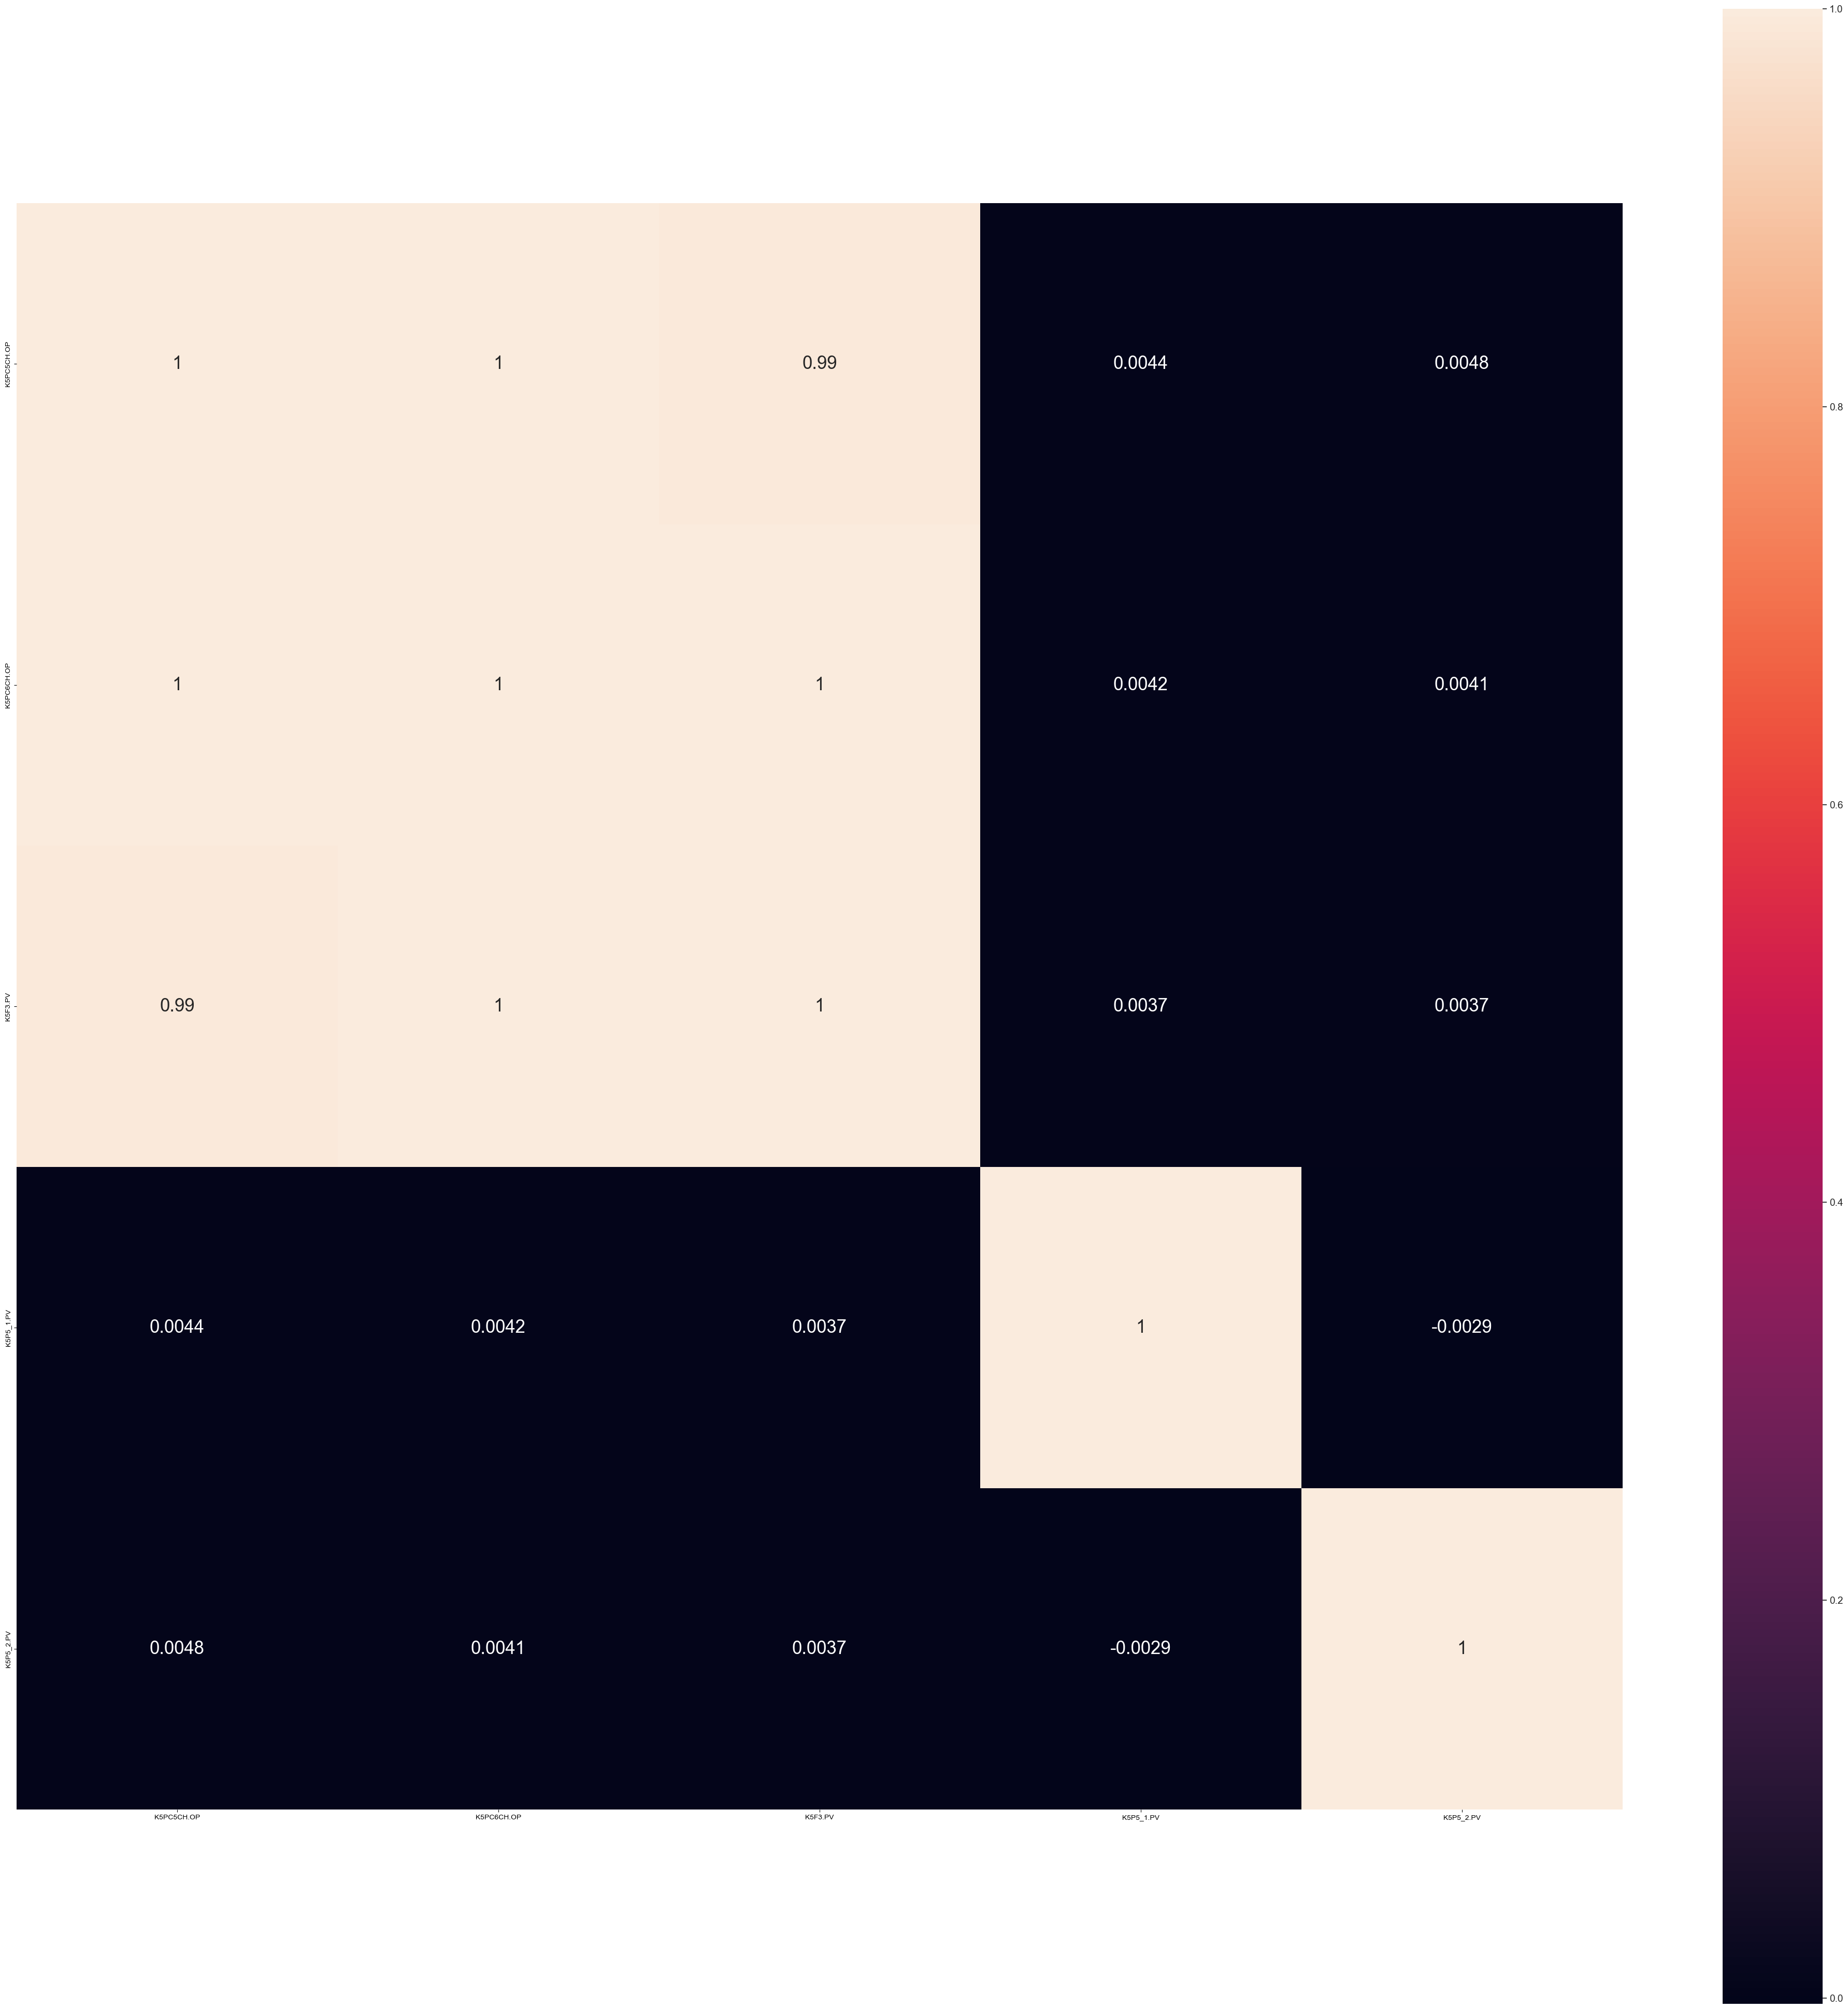

In [3]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [5]:
df = pd.read_csv('..\Initial_data\K5P5_1\K5P5_1.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_104\2890558511.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5P5_1\K5P5_1.csv', ";")


,K5PC5CH.OP,K5PC6CH.OP,K5F3.PV,K5P5_1.PV
0,55.23667,66.62437,3057.232,-47.07813
1,51.20797,62.53260,2933.963,-47.03672
2,54.09286,65.54526,3047.120,-47.03203
3,49.14302,60.71354,2861.507,-46.89766
4,55.51667,66.38338,3078.211,-46.33672
...,...,...,...,...
24457,30.18042,42.41229,2045.451,-41.00000
24458,28.80854,41.27526,1954.351,-41.00000
24459,27.82766,40.06375,1935.349,-41.00000
24460,29.78396,42.25344,2103.634,-42.00000


In [6]:
df=df.dropna()
df=df.round(4)
df=df.drop_duplicates(["K5PC5CH.OP"])
df=df.drop_duplicates(["K5PC6CH.OP"])
df=df.drop_duplicates(["K5F3.PV"])
df=df.drop_duplicates(["K5P5_1.PV"])
df 

,K5PC5CH.OP,K5PC6CH.OP,K5F3.PV,K5P5_1.PV
0,55.2367,66.6244,3057.232,-47.0781
1,51.2080,62.5326,2933.963,-47.0367
2,54.0929,65.5453,3047.120,-47.0320
3,49.1430,60.7135,2861.507,-46.8977
4,55.5167,66.3834,3078.211,-46.3367
...,...,...,...,...
24426,41.1129,52.3273,2516.867,-36.0000
24427,43.0477,54.4567,2656.752,-38.0000
24429,50.3492,61.7148,2923.204,-39.0000
24440,36.8660,48.4612,2315.733,-40.0000


In [7]:
y = df.drop(['K5PC5CH.OP', 'K5PC6CH.OP', 'K5F3.PV'], axis=1)
x = df.drop(['K5P5_1.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)

In [8]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(x, y)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.172968353581382, tolerance: 2.4860634864033235
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.48121404485937, tolerance: 2.4860634864033235
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.40486972425788, tolerance: 2.4860634864033235
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordin

C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.524432728656393, tolerance: 2.4860634864033235
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.521364492422435, tolerance: 2.4860634864033235
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.51847808968523, tolerance: 2.4860634864033235
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordi

C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.591505704251176, tolerance: 2.7251697523129446
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.586324066149245, tolerance: 2.7251697523129446
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.581348552619602, tolerance: 2.7251697523129446
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coord

C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.03521275681851, tolerance: 2.495951127700635
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.030987335358077, tolerance: 2.495951127700635
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.02615801938009, tolerance: 2.495951127700635
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate

C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.907727240472013, tolerance: 2.495951127700635
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7997371976252907, tolerance: 1.2845318088168465
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.755923273083681, tolerance: 1.2845318088168465
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordin

C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.235288531854167, tolerance: 1.2845318088168465
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.233329830221919, tolerance: 1.2845318088168465
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:625: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.231460101342236, tolerance: 1.2845318088168465
  model = cd_fast.enet_coordinate_descent_multi_task(
C:\Users\arufa\anaconda3\lib\site-packages\sklearn\linear_model\_coordina

-0.00020918164853322985

In [9]:
import pickle
filename = '../model/K5P5_1.sav'
pickle.dump(clf, open(filename, 'wb'))